<a href="https://colab.research.google.com/github/krakowiakpawel9/decision_tree_course/blob/master/01_drzewo_decyzyjne_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Drzewo Decyzyjne

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
sns.set()

In [0]:
iris = load_iris()
X = iris.data[:, [2, 3]]
y = iris.target
names = iris.feature_names[2:]

In [99]:
print('Liczba próbek:', len(X))

Liczba próbek: 150


In [3]:
X[:5]

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2]])

In [4]:
y[:5]

array([0, 0, 0, 0, 0])

In [31]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [9]:
names

['petal length (cm)', 'petal width (cm)']

### Budowa klasyfikatora drzewa decyzyjnego
- max_depth=1


In [17]:
tree_clf = DecisionTreeClassifier(max_depth=1, random_state=30)
tree_clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=30, splitter='best')

### Wykreślenie granic decyzyjnych

Text(0.5, 1.0, 'Drzewo decyzyjne: max_depth=1')

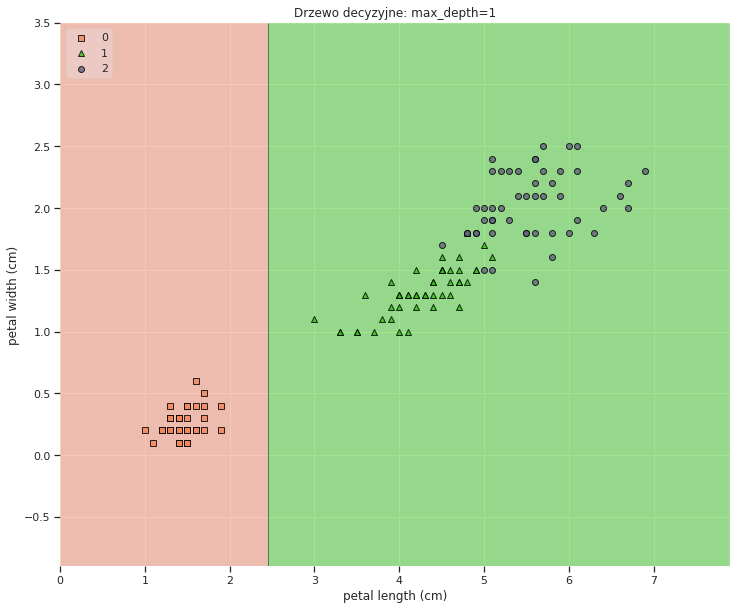

In [76]:
from mlxtend.plotting import plot_decision_regions

colors='#f1865b,#31c30f,#64647F,#d62728,#9467bd,#8c564b,#e377c2,#7f7f7f,#bcbd22,#17becf'

plt.figure(figsize=(12, 10))
plot_decision_regions(X, y, tree_clf, legend=2, colors=colors)
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.title('Drzewo decyzyjne: max_depth=1')

In [77]:
print('Dokładność modelu: ' + str(round(tree_clf.score(X, y), 4) * 100) + '%')

Dokładność modelu: 66.67%


### Utworzenie grafu drzewa

In [0]:
from sklearn.tree import export_graphviz

export_graphviz(tree_clf,
               out_file='iris_tree.dot',
               feature_names=iris.feature_names[2:],
               class_names=iris.target_names,
               rounded=True,
               filled=True)

### Przekonwertowanie pliku .dot na plik .png

In [0]:
%%bash
dot -Tpng iris_tree.dot -o iris_tree_1.png

### Graf drzewa decyzyjnego
- max_depth = 1

<img src="https://ml-repository-krakers.s3-eu-west-1.amazonaws.com/decision_tree_course/graphs/iris_tree.png" width=300></img>

### Budowa prostej funkcji dla modelu drzewa decyzyjnego

In [0]:
def make_decision_tree(max_depth=1):
    # train model
    tree_clf = DecisionTreeClassifier(max_depth=max_depth, random_state=30)
    tree_clf.fit(X, y)

    # export graph
    export_graphviz(tree_clf,
               out_file='iris_tree.dot',
               feature_names=iris.feature_names[2:],
               class_names=iris.target_names,
               rounded=True,
               filled=True)
    
    # plot decision boundries
    colors='#f1865b,#31c30f,#64647F,#d62728,#9467bd,#8c564b,#e377c2,#7f7f7f,#bcbd22,#17becf'
    plt.figure(figsize=(12, 10))
    ax = plot_decision_regions(X, y, tree_clf, legend=0, colors=colors)
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, ['setosa', 'versicolor', 'virginica'], framealpha=0.3)
    plt.xlabel('petal length (cm)')
    plt.ylabel('petal width (cm)')
    plt.title('Drzewo decyzyjne: max_depth={}'.format(max_depth))
    
    # accuracy
    print('Dokładność modelu: ' + str(round(tree_clf.score(X, y) * 100, 2)) + '%')

### Budowa klasyfikatora drzewa decyzyjnego
- max_depth=2


Dokładność modelu: 96.0%


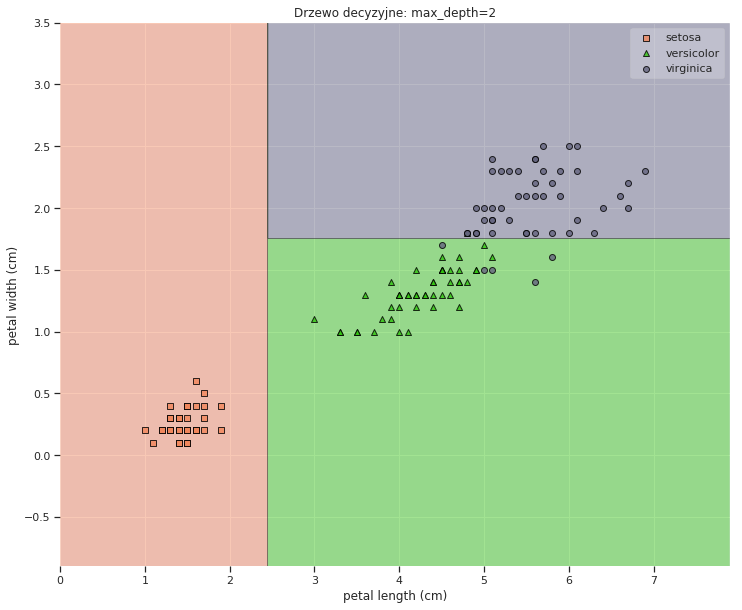

In [88]:
make_decision_tree(max_depth=2)

In [0]:
%%bash 
dot -Tpng iris_tree.dot -o iris_tree_2.png

<img src='https://ml-repository-krakers.s3-eu-west-1.amazonaws.com/decision_tree_course/graphs/iris_tree_2.png' width=350>

### Budowa klasyfikatora drzewa decyzyjnego
- max_depth=3

Dokładność modelu: 97.33%


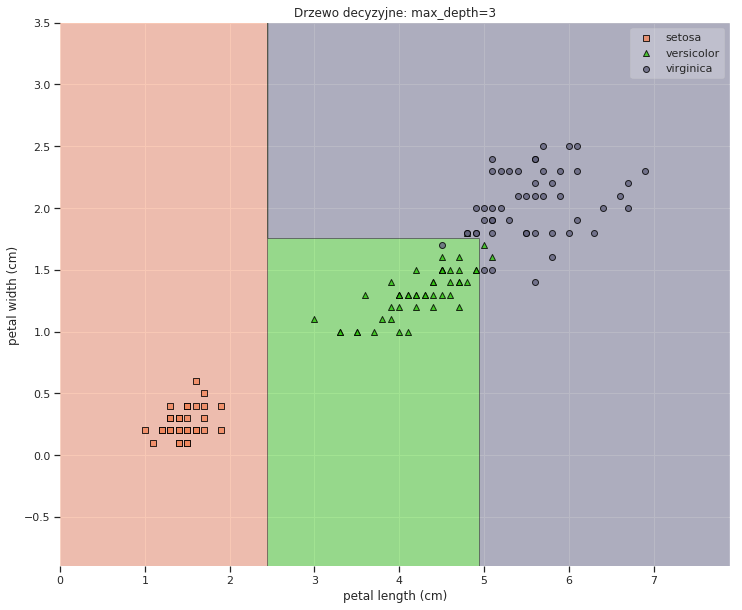

In [89]:
make_decision_tree(max_depth=3)

In [0]:
%%bash
dot -Tpng iris_tree.dot -o iris_tree_3.png

<img src="https://ml-repository-krakers.s3-eu-west-1.amazonaws.com/decision_tree_course/graphs/iris_tree_3.png" width=500>

### Budowa klasyfikatora drzewa decyzyjnego
- max_depth=4

Dokładność modelu: 98.67%


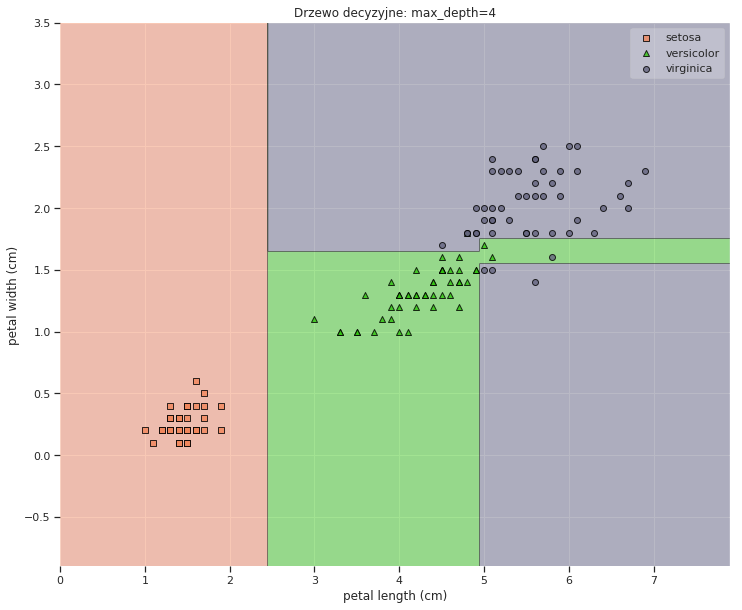

In [98]:
make_decision_tree(max_depth=4)

In [0]:
%%bash
dot -Tpng iris_tree.dot -o iris_tree_4.png

<img src='https://ml-repository-krakers.s3-eu-west-1.amazonaws.com/decision_tree_course/graphs/iris_tree_4.png' width=700> 

### Budowa klasyfikatora drzewa decyzyjnego
- max_depth=5

Dokładność modelu: 99.33%


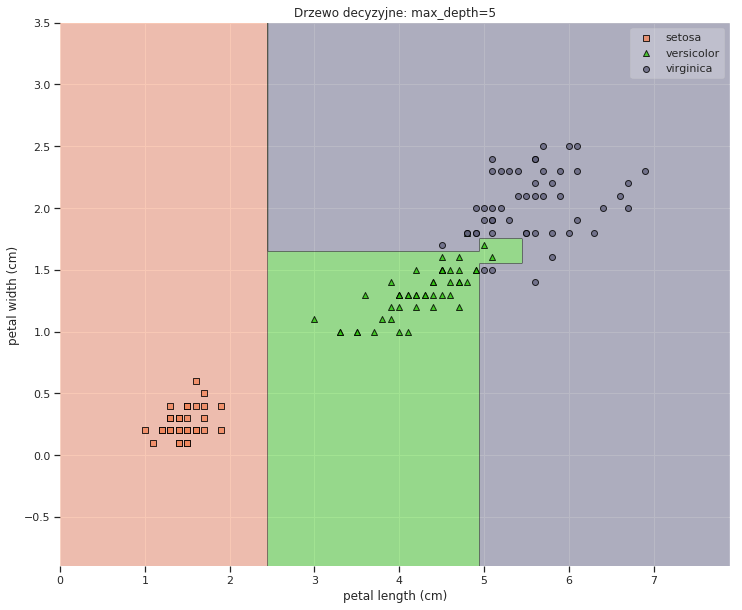

In [97]:
make_decision_tree(max_depth=5)

In [0]:
%%bash
dot -Tpng iris_tree.dot -o iris_tree_5.png

<img src='https://ml-repository-krakers.s3-eu-west-1.amazonaws.com/decision_tree_course/graphs/iris_tree_5.png'>